In [26]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import pandas as pd
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv('./criminal_train.csv')
test_file = pd.read_csv('./criminal_test.csv')

In [3]:
print df.columns

Index([u'PERID', u'IFATHER', u'NRCH17_2', u'IRHHSIZ2', u'IIHHSIZ2',
       u'IRKI17_2', u'IIKI17_2', u'IRHH65_2', u'IIHH65_2', u'PRXRETRY',
       u'PRXYDATA', u'MEDICARE', u'CAIDCHIP', u'CHAMPUS', u'PRVHLTIN',
       u'GRPHLTIN', u'HLTINNOS', u'HLCNOTYR', u'HLCNOTMO', u'HLCLAST',
       u'HLLOSRSN', u'HLNVCOST', u'HLNVOFFR', u'HLNVREF', u'HLNVNEED',
       u'HLNVSOR', u'IRMCDCHP', u'IIMCDCHP', u'IRMEDICR', u'IIMEDICR',
       u'IRCHMPUS', u'IICHMPUS', u'IRPRVHLT', u'IIPRVHLT', u'IROTHHLT',
       u'IIOTHHLT', u'HLCALLFG', u'HLCALL99', u'ANYHLTI2', u'IRINSUR4',
       u'IIINSUR4', u'OTHINS', u'CELLNOTCL', u'CELLWRKNG', u'IRFAMSOC',
       u'IIFAMSOC', u'IRFAMSSI', u'IIFAMSSI', u'IRFSTAMP', u'IIFSTAMP',
       u'IRFAMPMT', u'IIFAMPMT', u'IRFAMSVC', u'IIFAMSVC', u'IRWELMOS',
       u'IIWELMOS', u'IRPINC3', u'IRFAMIN3', u'IIPINC3', u'IIFAMIN3',
       u'GOVTPROG', u'POVERTY3', u'TOOLONG', u'TROUBUND', u'PDEN10',
       u'COUTYP2', u'MAIIN102', u'AIIND102', u'ANALWT_C', u'VESTR', u'VEREP',

In [4]:
ids = test_file['PERID']
df = df.drop(['PERID'],axis=1)
test_file = test_file.drop(['PERID'],axis=1)

In [5]:
df = df.apply(LabelEncoder().fit_transform)
test_file = test_file.apply(LabelEncoder().fit_transform)

In [6]:
df = df.values
test_file = test_file.values

In [7]:
# print df[0]
# print "---"
# print df[:5]

In [8]:
split = int(0.80*df.shape[0])
x_train = df[:split,:-1]
y_train = df[:split,-1]
x_test = df[split:,:-1]
y_test = df[split:,-1]
print split
print x_train.shape,y_train.shape
print x_test.shape,y_test.shape

36574
(36574, 70) (36574,)
(9144, 70) (9144,)


In [9]:
def pca(X,d=None):
    if d==None:
        d = X.shape[1]
        
    A = np.cov(X,rowvar=False)
    eig_vals,eig_vecs = np.linalg.eig(A)
    Z = X.dot(eig_vecs)
    red_Z = Z[:,:d]
    return eig_vals,eig_vecs,Z,red_Z

In [10]:
eig_vals,eig_vecs,Z,red_Z = pca(x_train)

In [11]:
print eig_vals.shape,eig_vecs.shape
print Z.shape

(70,) (70, 70)
(36574, 70)


In [12]:
info = []
for ix in range(eig_vals.shape[0]):
    dx = [eig_vals[ix],eig_vecs[:,ix]]
    info.append(dx)
info = sorted(info,reverse=True,key=lambda z:z[0])

sorted_vals = []
sorted_vecs = []
for ix in range(eig_vals.shape[0]):
    sorted_vals.append(info[ix][0])
    sorted_vecs.append(info[ix][1])
sorted_vals = np.asarray(sorted_vals)
sorted_vecs = np.asarray(sorted_vecs)
print sorted_vals.shape
print sorted_vecs.shape

(70,)
(70, 70)


In [13]:
explained_variances_ratio = sorted_vals/sum(sorted_vals)

In [14]:
cumulative_explained_ratio = np.cumsum(explained_variances_ratio)

In [17]:
print cumulative_explained_ratio[5]

0.999999894525


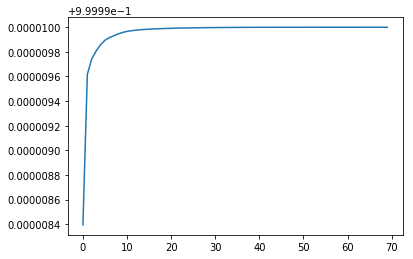

In [18]:
plt.plot(np.cumsum(explained_variances_ratio))

In [19]:
def new_pca(X,d=None):
    
    if d==None:
        d = X.shape[1]
        
    A = np.cov(X,rowvar=False)
    eig_vals,eig_vecs = np.linalg.eig(A)
#     Z = X.dot(eig_vecs)
#     red_Z = Z[:,:d]
   
    info = []
    for ix in range(eig_vals.shape[0]):
        dx = [eig_vals[ix],eig_vecs[:,ix]]
        info.append(dx)
    info = sorted(info,reverse=True,key=lambda z:z[0])
    
    sorted_vals = []
    sorted_vecs = []
    for ix in range(eig_vals.shape[0]):
        sorted_vals.append(info[ix][0])
        sorted_vecs.append(info[ix][1])
    sorted_vals = np.asarray(sorted_vals)
    sorted_vecs = np.asarray(sorted_vecs)
    
    Z = X.dot(sorted_vecs)
    red_Z = X[:,:d]
    return eig_vals,eig_vecs,Z,red_Z


In [37]:
eig_vals,eig_vecs,Z,red_Z1 = new_pca(x_train,d=35)
eig_vals,eig_vecs,Z,red_Z2 = new_pca(x_test,d=35)

In [38]:
print red_Z1.shape
print red_Z2.shape

(36574, 35)
(9144, 35)


In [39]:
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

In [40]:
dt.fit(red_Z1,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [41]:
print dt.score(red_Z1,y_train)
print dt.score(red_Z2,y_test)

0.939820637611
0.928477690289


In [42]:
rf.fit(red_Z1,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [43]:
print rf.score(red_Z1,y_train)
print rf.score(red_Z2,y_test)

0.939027724613
0.930664916885


In [44]:
_,_,_,red_Z3 = new_pca(test_file,d=35)

In [45]:
predictions = rf.predict(red_Z3)

In [46]:
dataframe = {
    'PERID' : ids,
    'Criminal': predictions
}

In [47]:
output = pd.DataFrame(data=dataframe)

In [48]:
output.to_csv('pca_out.csv',sep=',',index=False,columns=['PERID','Criminal'])